In [1]:
format compact


ans =

    '9.8.0.1538580 (R2020a) Update 6'



# Koch snöflingan

<https://en.wikipedia.org/wiki/Koch_snowflake>

är en själv-similär fraktal.

<https://en.wikipedia.org/wiki/Self-similarity>

Den kan konstrueras iterativt genom att

1. Givet en linje mellan två punkter
2. Dela upp linjen i fyra nya linjer med 1/3 av linjens längd, enl. figur nedan.
3. För varje nytt linje-segment repetera proceduren från punkt 1.

In [ ]:
%%file koch_step.m

function v = koch_step(v_start)

v = v_start;

R = [0, -1; 1, 0]; % Rotation matrix

vn = [[]];
for j = 1:length(v) - 1
      
    v1 = v(:, j);
    v2 = v(:, j + 1);

    dv_para = 1/3 * (v2 - v1);
    dv_orth = sqrt(3)/2 * R * dv_para;
      
    v3 = v1 + dv_para;
    v4 = v2 - dv_para;
    v5 = v3 + dv_para/2 + dv_orth;
      
    vv = [v1, v3, v5, v4];
    vn = [vn, vv];
end
vn = [vn, v2];
v = vn;

end

In [ ]:
%%file koch.m

function v = koch(v_start, steps)

v = v_start;

R = [0, -1; 1, 0]; % Rotation matrix

for i = 1:steps
    vn = [[]];
    for j = 1:length(v) - 1
      
      v1 = v(:, j);
      v2 = v(:, j + 1);

      dv_para = 1/3 * (v2 - v1);
      dv_orth = sqrt(3)/2 * R * dv_para;
      
      v3 = v1 + dv_para;
      v4 = v2 - dv_para;
      v5 = v3 + dv_para/2 + dv_orth;
      
      vv = [v1, v3, v5, v4];
      vn = [vn, vv];
    end
    vn = [vn, v2];
    v = vn;
end

end

In [ ]:
%%file koch_dir.m

function v = koch_dir(v_start, steps, dir)

v = v_start;

R = dir * [0, -1; 1, 0]; % Rotation matrix
a
for i = 1:steps
    vn = [[]];
    for j = 1:length(v) - 1
      
      v1 = v(:, j);
      v2 = v(:, j + 1);

      dv_para = 1/3 * (v2 - v1);
      dv_orth = sqrt(3)/2 * R * dv_para;
      
      v3 = v1 + dv_para;
      v4 = v2 - dv_para;
      v5 = v3 + dv_para/2 + dv_orth;
      
      vv = [v1, v3, v5, v4];
      vn = [vn, vv];
    end
    vn = [vn, v2];
    v = vn;
end

end

In [6]:
?%plot

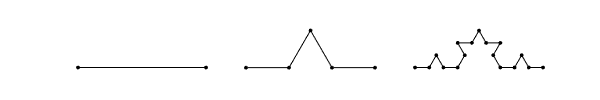

In [13]:
%plot -s 600,100

% %%plot -s 600,100 -r 192

v = [[-1; 0], [+1; 0]];

fig = figure();
N = 3;
for i = 1:N
    subplot(1, N, i)
    plot(v(1, :), v(2, :), '.-k')
    axis('image')
    xlim([-1.0, 1.0])
    ylim([-0.05, 0.66])
    axis('off')
    v = koch(v, 1);
end

print(fig, '-dsvg', 'koch_steps.svg')
print(fig, '-dpng', 'koch_steps.png')

In [2]:
v1 = [-1, -1/sqrt(3)]';
v2 = [+1, -1/sqrt(3)]';
v3 = [ 0, +2/sqrt(3)]';

v_tri = [v1, v2, v3, v1];


ans =

    '9.8.0.1538580 (R2020a) Update 6'



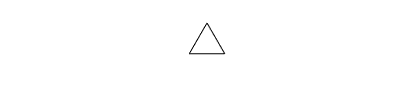

In [3]:
x = v_tri(1, :);
y = v_tri(2, :);

plot(x, y, '-k')
xlim([-2, 2])
ylim([-2, 2])
axis('square')
axis('off')

In [ ]:
figure()
for N = 0:3
    v = koch(v_tri, N, -1);
    subplot(2, 2, N+1)
    plot(v(1,:), v(2, :), '-k')
    xlim([-1.5, 1.5])
    ylim([-1.5, 1.5])
    axis('square')
    text(-1.25, 1, sprintf("N = %i", N))
end

In [ ]:
v_flake = koch(v_tri, 6, -1);

x = v_flake(1, :);
y = v_flake(2, :);

fig = figure();
plot(x, y, '-k')
xlim([-1.5, 1.5])
ylim([-1.5, 1.5])
axis('square')
axis('off')

print(fig, '-dsvg', 'koch.svg')

In [ ]:
v_rev = koch(v_tri, 6, +1);

x = v_rev(1, :);
y = v_rev(2, :);

fig = figure();
plot(x, y, '-k')
xlim([-1.5, 1.5])
ylim([-1.5, 1.5])
axis('square')
axis('off')

print(fig, '-dsvg', 'koch_rev.svg')

## The Barnsley fern

<https://en.wikipedia.org/wiki/Barnsley_fern>

In [ ]:
N = 100000;

xy = [0; 0];
fern = zeros(N, 2);

f_1 = [0 0; 0 0.16];
f_2 = [0.85 0.04; -0.04 0.85];
f_3 = [0.2 -0.26; 0.23 0.22];
f_4 = [-0.15 0.28; 0.26 0.24];

P = randsample(1:4, N, true, [0.01 0.85 0.07 0.07]);

for i = 2:N
    p = P(i - 1);
    if p == 1 % Stem
        xy = f_1 * xy;
    elseif p == 2 % Sub-leaflets
        xy = f_2 * xy + [0; 1.6];
    elseif p == 3 % Left leaflet
        xy = f_3 * xy + [0; 1.6];
    else % Right leaflet
        xy = f_4 * xy + [0; 0.44];
    end
    
    fern(i, 1) = xy(1);
    fern(i, 2) = xy(2);
end

In [ ]:
fig = figure();

darkgreen = [0, 0.5, 0];

colormap(summer(N));
set(gcf, 'Color', 'k', 'position', [10, 50, 800, 600]);
s = scatter(fern(:, 1), fern(:, 2), 1.0, darkgreen, 'filled');
alpha(s, 0.5)
set(gca, 'Color', 'k');
axis('image')
axis('off')

print(fig, '-dpng', 'barnsley.png', '-r600')

# Mandelbrot set

<https://en.wikipedia.org/wiki/Mandelbrot_set>

In [ ]:
N = 2 * 350;
M = 2 * 300;
depth = 32;

x = linspace(-2.5, 1, N);
y = linspace(-1.5, 1.5, M);
A = zeros([N, M]);

tic
for i = 1:length(x)
for j = 1:length(y)
    z = 0.;
    z0 = x(i) + 1i * y(j);
    for iteration = 1:depth
        z = z.^2 + z0;
        if abs(z) > 4
            break
        end
    end
    A(i, j) = iteration;
end
end
toc

image(A')

axis('image'); colormap(flipud(jet(depth))); axis off;
colorbar

In [ ]:
N = 2 * 350;
M = 2 * 300;

depth = 32;

x = linspace(-2.5, 1, N);
y = linspace(-1.5, 1.5, M);
A = zeros([N, M]);

z0 = x' + 1.j * y;
z = zeros([N, M]);

tic
for iter = 1:depth
    z = z.^2 + z0;
    A = (A == 0) .* (abs(z) > 4) * iter + A .* (A > 0);
end
A = (A == 0) * depth + A .* (A > 0);
toc

image(A')

axis('image'); colormap(flipud(jet(depth))); axis off;
colorbar

## Julia set

<https://en.wikipedia.org/wiki/Julia_set>

In [ ]:
c = -0.8 + 0.156i
%c = 0.285 + 0.01i
R = 2

In [ ]:
N = 400;
M = 300;
depth = 32;

x = linspace(-2.0, 2.0, N);
y = linspace(-1.5, 1.5, M);
A = zeros([N, M]);

for i = 1:length(x)
for j = 1:length(y)
    z = x(i) + 1i * y(j);
    for iteration = 1:depth
        z = z.^2 + c;
        if abs(z) > R
            break
        end
    end
    A(i, j) = iteration;
end
end

image(A')

axis('image'); colormap(flipud(jet(depth))); axis off;